# **Task #3 - Exploratory data analysis on 'SampleSuperstore' dataset**

*Objective: To perform data analysis and find the weak areas where the business could make more profit.*

*Author: Ramy Naccache*

**Step 1: Setting up necessary imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

**Step 2: Reading & displaying the dataset**

In [4]:
#SampleSuperstore dataset
data = pd.read_csv("SampleSuperstore.csv")

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164


**Step 3: Preprocessing data**

In [6]:
# displaying the number of rows and columns
data.shape

(9416, 13)

In [7]:
# displaying the column names
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
# displaying null data (if any)
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     1
Region          1
Category        1
Sub-Category    1
Sales           1
Quantity        1
Discount        1
Profit          1
dtype: int64

In [9]:
# displaying basic data stats
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9415.000000,9415.000000,9415.000000,9415.000000,9415.000000
mean,55164.217950,230.673306,3.787679,0.156527,29.141801
std,32050.408371,630.543607,2.216279,0.206791,235.859398
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23101.500000,17.340000,2.000000,0.000000,1.724800
50%,57103.000000,54.528000,3.000000,0.200000,8.643600
75%,90004.000000,210.200000,5.000000,0.200000,29.341200
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# displaying the number of duplicated values (if any)
data.duplicated().sum()

16

In [11]:
# dropping the duplicated values
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164


In [12]:
# dropping unneeded columns
data = data.drop(['Postal Code'], axis=1)

In [13]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164


**Step 4: Performing exploratory data analysis**

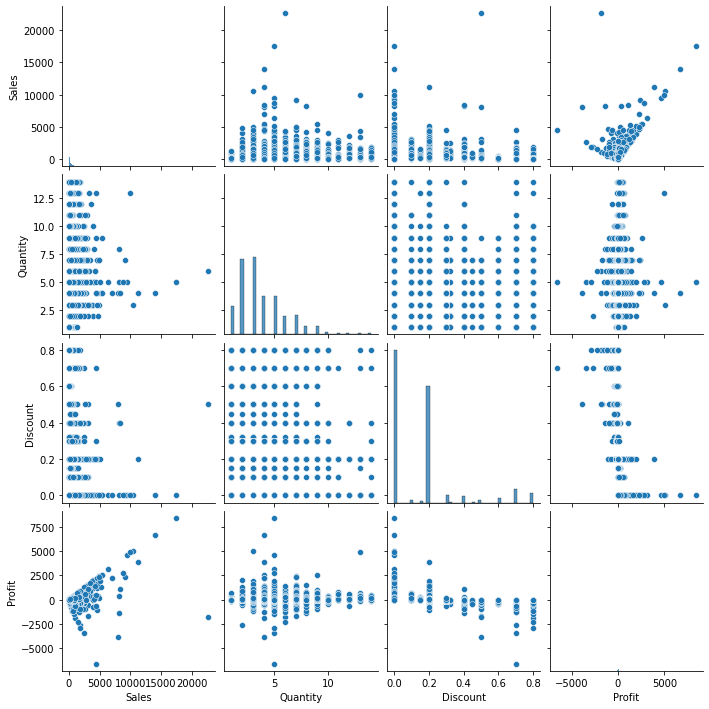

In [14]:
sns.pairplot(data)

In [15]:
# checking the correlation between each pair of data
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.195658,-0.029520,0.495301
Quantity,0.195658,1.000000,0.009426,0.071226
Discount,-0.029520,0.009426,1.000000,-0.217571
Profit,0.495301,0.071226,-0.217571,1.000000


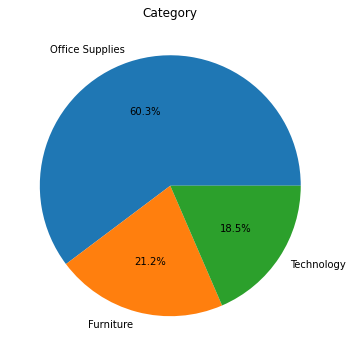

In [16]:
# Visualising category distribution
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

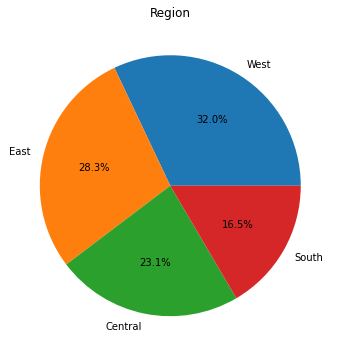

In [17]:
# plotting sales by each region
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(data['Region'].value_counts(), labels=data['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x1152 with 0 Axes>

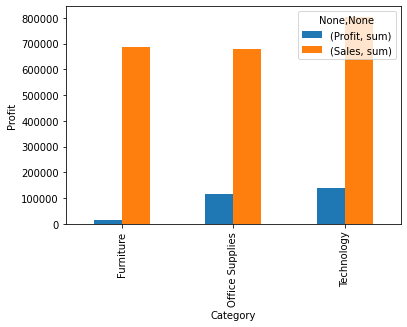

In [18]:
# plotting the relation between each category and its profit
plt.figure(figsize= (10,16))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

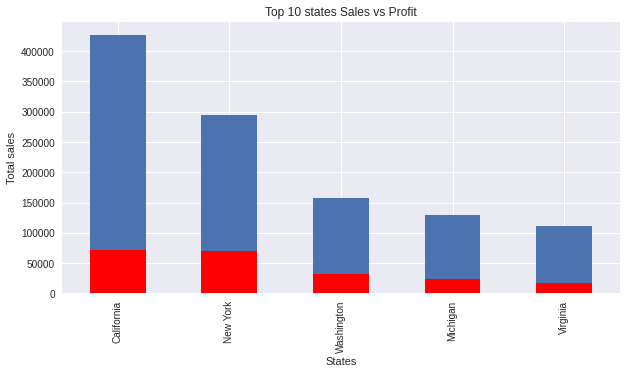

In [19]:
# Visualising top 5 states in term of sales and profit
top_states_s = data.groupby("State").Sales.sum().nlargest(n=5)
top_states_p = data.groupby("State").Profit.sum().nlargest(n = 5)
plt.style.use('seaborn')
top_states_s.plot(kind = 'bar',figsize = (10,5))
top_states_p.plot(kind = 'bar',figsize = (10,5),color = 'red')
plt.xlabel('States')
plt.ylabel('Total sales')
plt.title("Top 10 states Sales vs Profit")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1008x864 with 0 Axes>

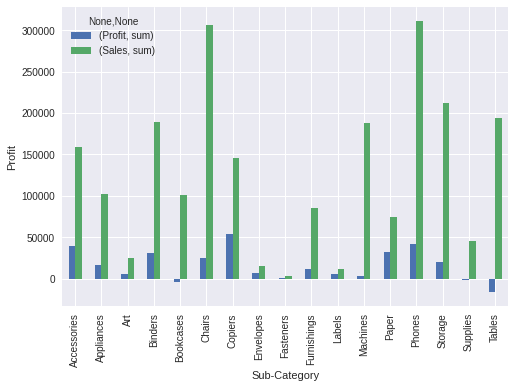

In [22]:
# plotting the relation between each sub-category and its profit
plt.figure(figsize=(14,12))
subcat = data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

<Figure size 1008x864 with 0 Axes>

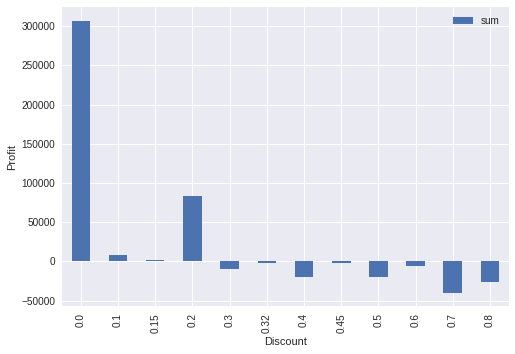

In [23]:
# plotting the relation between discount and profit data
plt.figure(figsize=(14,12))
subcat = data.groupby('Discount')['Profit'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

# **Observations:**
From the previous data, we can make the following conclusions:

*   Decrease the sales of furniture because of its low profit.
*   Increase the sales of the products in the Technology category due to its high profit.


*   Table sales should be limited since it causes negative profit. (loss)
*   Copiers sales should be increased since they have the highest profit value.


*   Increase the sales in the west region especially in New-York and California for more profit.
*   Decrease the number of 70% discount promotion codes as they provide the highest loss in profit value.







